In [0]:
from google.colab import files
uploaded = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers (1).csv


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import pandas as pd
import pandas.core.tools.datetimes as datetools
import datetime
from datetime import timedelta

import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
# Importing the training set
data = pd.read_csv('international-airline-passengers.csv')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [0]:
# # we will be using the number of passengers in this project 

# assign to just passenger number to this new smaller data.
dataset = data.iloc[:,1].values

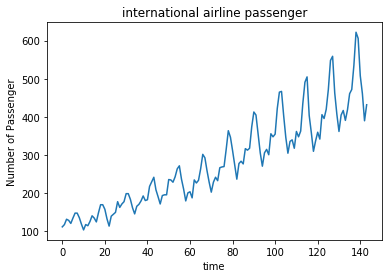

In [0]:
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [0]:
# Let's look at the shape of data.
dataset.shape

(145,)

In [0]:
# As you can see; shape of data is (145,). We should reshape it.
dataset =dataset.reshape(-1,1)
dataset.astype("float32")
dataset.shape

(145, 1)

In [0]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(145, 1)

In [0]:
# After reshaping, we should scale all of datas between 0 and 1.

from sklearn.preprocessing import MinMaxScaler #import scling library
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(dataset)


In [0]:
# Let's check our data!
# We have scaled our data. Time to Train, Test Split our data

data_scaled

In [0]:
train_data_size = int(len(data_scaled)*0.70)
test_data_size = len(data_scaled) - train_data_size
print("Train data size is {}".format(train_data_size))
print("Test data size is {}".format(test_data_size))

Train data size is 101
Test data size is 44


In [0]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset)- train_size 
train = dataset[0:train_size,:]
test = dataset [train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train),len(test)))

In [0]:
train = data_scaled[0:train_data_size,:]
test = data_scaled[train_data_size:len(data_scaled),:]
# Let's check number of train and test datas again
print("Train data size is {}".format(len(train)))
print("Test data size is {}".format(len(test)))

Train data size is 101
Test data size is 44


In [0]:
x_train = []
y_train = []
time_steps=10
for i in range(len(train)-time_steps-1):
    a = train[i:(i+time_steps),0]
    x_train.append(a)
    y_train.append(train[i + time_steps,0])
trainX = np.array(x_train)
trainY = np.array(y_train)

In [0]:
trainX.shape

(90, 10)

In [0]:
x_test = []
y_test = []
for i in range(len(test)-time_steps-1):
    a = test[i:(i+time_steps),0]
    x_test.append(a)
    y_test.append(test[i + time_steps,0])
testX = np.array(x_test)
testY = np.array(y_test)

In [0]:
testX.shape

(33, 10)

In [0]:
# Let's reshape trainX and testX
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (90, 10, 1)
Shape of testX is (33, 10, 1)


In [0]:
start = datetime.datetime.strptime("1949-01-01", "%Y-%m-%d")
type(start)

datetime.datetime

In [0]:
print(start)

1949-01-01 00:00:00


In [0]:
len(dataset)

145

In [0]:
#Scaling
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [0]:
train = dataset[:int(0.7*(len(dataset)))]
valid = dataset[int(0.7*(len(dataset))):]

In [0]:
#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


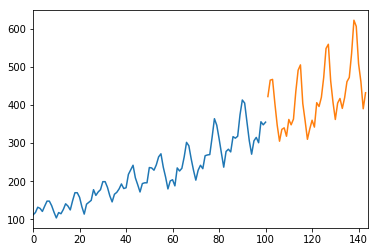

In [0]:
#plotting the data
import matplotlib.pyplot as plt
train['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot()
valid['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot()

In [0]:
from pmdarima.arima import auto_arima

In [0]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=895.566, BIC=911.197, Fit time=0.408 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=917.952, BIC=923.162, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=915.557, BIC=923.372, Fit time=0.046 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=913.419, BIC=921.234, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=894.597, BIC=907.623, Fit time=0.253 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=908.790, BIC=919.211, Fit time=0.115 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=896.545, BIC=912.176, Fit time=0.402 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=894.889, BIC=913.125, Fit time=0.400 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=903.738, BIC=914.159, Fit time=0.148 seconds
Total fit time: 1.873 seconds


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

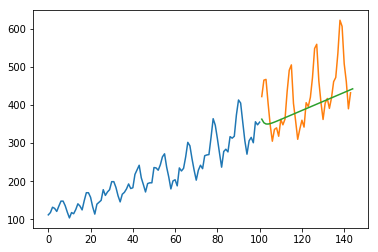

In [0]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=895.566, BIC=911.197, Fit time=0.339 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=917.952, BIC=923.162, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=915.557, BIC=923.372, Fit time=0.045 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=913.419, BIC=921.234, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=894.597, BIC=907.623, Fit time=0.254 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=908.790, BIC=919.211, Fit time=0.117 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=896.545, BIC=912.176, Fit time=0.376 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=894.889, BIC=913.125, Fit time=0.410 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=903.738, BIC=914.159, Fit time=0.150 seconds
Total fit time: 1.774 seconds


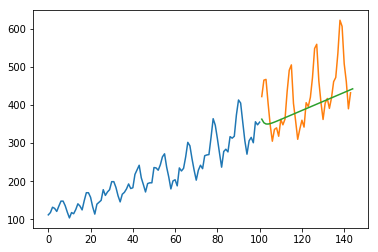

In [0]:

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [0]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

In [0]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

## ARIMA and SARIMA

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams

In [0]:
# Importing the training set
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [0]:
df = df.drop(df.index[144])

In [0]:
df['Month'] = pd.to_datetime(df['Month'],yearfirst=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                                                                             144 non-null datetime64[ns]
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [0]:
df.index = df['Month']

In [0]:
df = df.drop('Month',axis=1)

In [0]:
df.columns = ['Passengers']

In [0]:
df.head(2)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0


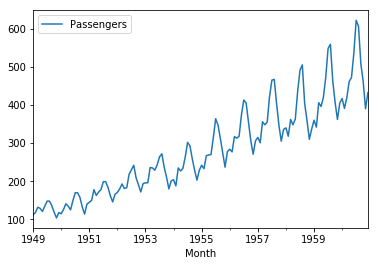

In [0]:
df.plot()

In [0]:
from statsmodels.tsa.stattools import adfuller as adf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

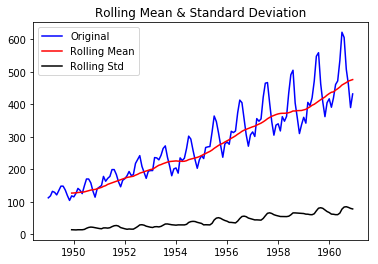

In [0]:
test_stationarity(df)

In [0]:
output = (adf(df['Passengers']))
output

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [0]:
dfoutput = pd.Series(output[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in output[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


As p-value is quite greater than critical value, there is non stationarity which can be seen from an increasing rolling mean

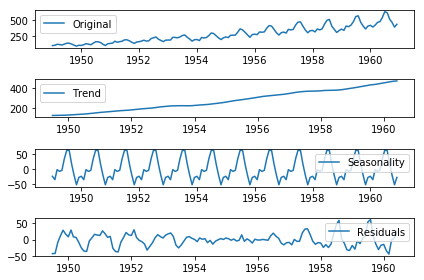

In [0]:
#estimating trend and seasonlity
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

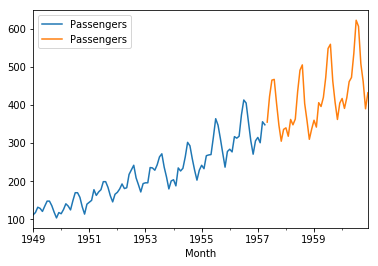

In [0]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

#plotting the data
ax = train.plot()
valid.plot(ax=ax)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=886.147, BIC=901.718, Fit time=0.353 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=909.769, BIC=914.959, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=907.370, BIC=915.155, Fit time=0.044 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=904.979, BIC=912.764, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=884.966, BIC=897.942, Fit time=0.273 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=900.136, BIC=910.517, Fit time=0.105 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=886.831, BIC=902.402, Fit time=0.367 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=885.874, BIC=904.040, Fit time=0.425 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=893.803, BIC=904.183, Fit time=0.179 seconds
Total fit time: 1.827 seconds


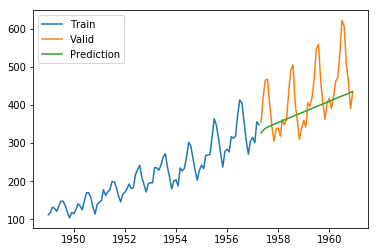

In [0]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=646.567, BIC=666.294, Fit time=2.176 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=652.680, BIC=657.612, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=645.940, BIC=655.803, Fit time=0.368 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=646.447, BIC=656.311, Fit time=0.430 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=647.792, BIC=655.190, Fit time=0.108 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=647.914, BIC=660.244, Fit time=1.082 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=647.927, BIC=660.257, Fit time=0.567 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=646.264, BIC=661.060, Fit time=4.430 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=649.280, BIC=656.678, Fit time=0.233 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 

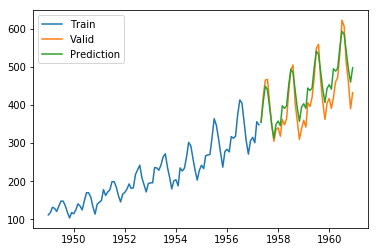

In [0]:
#using sarimax to account for seasonality and then forecasting
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12,D=1)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()